## Clasification

### Classifying simple Images
We leaned how we can train a neural network to learn the logic of an AND gate. Probably it was a good example but not as exiting. 

Aritifical Neural Networks are Universal Classifiers, this mean that if we are able to get information in a computable form and specify some classification classes we can pretty much train a neural network classify this infomration accurately.

### The MNIST Dataset
The MNIST Dataset is composed of 80 thousand digit images of 28 by 28 pixel resolution. The digits of these images are numbers from 0 to 9 handwritten by several people. Yann Le Cunn, the neural network god, used this dataset as a classification problem for zipcode numbers.





In [78]:
'''Importing libraries'''
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cPickle, gzip
import numpy as np
import math
%matplotlib inline

'''Reading the dataset'''
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

train_set_data = train_set[0][:2000]
train_set_labels = train_set[1][:2000]
test_set_data = test_set[0][:200]
test_set_labels = test_set[1][:200]


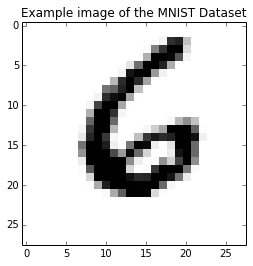

In [16]:
'''Reformating the image array into a matrix'''
counter = 0
imgArray  = []
row = []
for i in train_set_data[90]:
    if(counter%28 == 0):
        if counter !=0 : 
            imgArray.append(row)
        row = []
    row.append(i)
    counter+=1
imgArray.append(row)
plt.title("Example image of the MNIST Dataset")
digit = plt.imshow(imgArray, cmap='Greys',  interpolation='nearest')


### The Classificaiton Problem
On the previous lesson we used a single neuron since we only cared about a single output. In the case of classification we need a neuron per class or in this case per digit. The neuron that will have the highest output value will be the one that determines the correct classification. 

As an example, in this classification problem we will have 10 neurons each taking the product sum (sum of weight*pixel vale) of the pixel values with their respective weight value into its activation function. 

#### Single Neuron example

![alt text](https://deeplearning4j.org/img/perceptron_node.png "Logo Title Text 1")

In this case, if we want to classify the number 6 in our images the sixth output neuron will have a higuer value with respect to the other values. If we think in terms of probability we will have a probability distribution over each of the classes and the output with the higuest probability will determine the classification.

### Softmax for classification
We are going to built and train a neural network to classify an image into a digit, but first we need a smarter activation function. 

Softmax is a function that can give us the probability of a class given the output of all the neurons. In other, it is a function that creates a probability distribution among all classes. 

#### Softmax:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/001ce4c2c74e78a66a4d7d04ab92cbd0d0fdec02 "Logo Title Text 1")

In this case j is the category that we want to get the probability of given the input x, which is multiplied by its appropiate weights. 

We do not have to go deep into the meaning of the function we just need to know that it is the best activation function for classification. 

### Learning rule
The learning rule for softmax focuses on reducing an error function. The way to reduce the error is to move the weight parameters in the direction of the descreasing rate of change in order to archieve a minimum error. 

For softmax the error function is Cross Entropy. For practical puposes we will just describe the derived learning rule for softmax. You can learn more about this function and the derivation as a learning rule online.

The learning rule for the weights is defined as:

$$ w_{ik}(t+1) = w_{ik}(t) + \alpha * (teacher - output) *x_i $$

This is for a particular weight from input i to category or neuron k.  

Does it look familiar?

Yes, it is the same as the perceptron. For some reason the math works out giving us an universal learning rule that can be applied to multiple activation functions(softmax as an example).


#### Lets jump into an example aka Gradiend Descent. 
Lets build a neural network that takes all the pixel as inputs, they get multiplied by their respective weights and plug in into their respective activation functions. 

In Neural Networks we defined the input layer as the point where the infomation gets passed in. In this case, our input layer will be all the pixels going into the network. 

The output layer is defined, as the result of the neural nework operation. In this case, we will have an output layer consiting of an array of size 10 which defines the probability of each digit. The maximum value on that array defines the correct classification. 

![alt text](https://usercontent1.hubstatic.com/3993124_f260.jpg "Logo Title Text 1")

In the case of this problem we will have each pixel as an input which will have an appropiate weight to an output. The total number of weights will be (25 \* 25)+1 [pixels] * 10[categories]. We add an extra input as the bias term.

In this case the teacher will be 0 or one depending which category k we are trying to learn. 
The output will be a a probability value from 0-1.

To build the neural network we have to do these simple steps:

1. Get the input pixel vector multiply it by their respective category weights.
2. Plug in the result into the softmax equation.
3. Calculate the delta(error) teacher-output.
4. Update the weights using the learning rule. 
5. Repeat for every example.

Steps 1 and 2 are called **Forward Propagation**, since we are propagating the inputs into the outputs. 

Steps 3 and 4 are the **Learning** steps. 

train_set_data contains an array of pixels and  train_set_labels contains its appropiate labeled classification. 
Here is an example:



In [20]:
print "Image array length", len(train_set_data[0]), "Classigication lavel: ", train_set_labels[0]

Image array length 784 Classigication lavel:  5


## Lets build the neural network :
### Lets start by adding the bias term to each image array:

In [50]:
'''Initializing the new image array'''
new_train_set_date = []
for image in train_set_data:
    '''Appending the bias value 1'''
    image = np.append(image,1)
    '''appending the new image to the new image array'''
    new_train_set_date.append(image)
    
'''Updating the old array witht the new one'''
train_set_data = new_train_set_date

### Its time to initialize the weights to zero. 

In [48]:
'''Defined dimensions'''
ncols = 785
nrows = 10

'''Use python syntax magic to create a matrix'''
weights = [[0] * ncols for i in range(nrows)]

### Convert label value into a hot encoding array. 
This means that for each image we create an array of 10 categories. Only the index of the correct category has a 1 the other get 0.

In [63]:
label_encoding = []
for label in train_set_labels:
    encode = [0]*10
    encode[label] = 1
    label_encoding.append(encode)

### Defining the softmax function with 10 categories (k=10)

In [59]:
def softmax(net_values):
    '''Softmax function denominator'''
    denominator = 0
    
    exp_values = []
    '''Adding all the exponent of the net values together and saving their value'''
    for val in net_values:
        exponent = math.exp(val)
        
        exp_values.append( exponent)
        denominator += exponent
    
    '''Calculating the softmax value by doing the division'''
    softmax_array = []
    for val in exp_values:
        softmax_array.append(val/denominator)
    
    '''Returning the result'''
    return softmax_array


### Lets code the first two steps **Forward Propagation**

In [67]:
def forwardPropagation(image,weights):
    net_values = []

    '''Iterating thorugh each of the categories'''
    for category in range(0,10):

        weighted_sum = 0
        '''Calculating the weighted sum over all pixels on the image'''
        for i,pixel in enumerate(image):
            weighted_sum += weights[category][i]*pixel

        '''Appending to the net value array'''
        net_values.append(weighted_sum)

    '''Calculating the neural network output'''
    output = softmax(net_values)
    return output

### Now lets make that neural network learn, Step 3 and 4


In [70]:
def learning(image, weights, image_index, alpha):
    '''Getting the deltas'''
    deltas = []
    for cat, out_val in enumerate(output):
        deltas.append(label_encoding[image_index][cat] - out_val)

    '''Update the weights'''
    for category in range(0,10):
        '''Calculating the weighted sum over all pixels on the image'''
        for i,pixel in enumerate(image):
            weights[category][i] = weights[category][i] + alpha*deltas[category]*pixel
    
    return weights

### Time to iterate over the dataset and train our network 
An epoch is defined to be a complete look over all the training dataset. 
We need to go over the whole dataset more that once since we might not be able to train our neural network enough.

In [71]:
number_of_epochs = 1
alpha = 0.01
''''''
for epoch in range(number_of_epochs):
    '''Iterating throught the data set'''
    for index,image in enumerate(train_set_data):

        print index,
        output = forwardPropagation(image,weights)
        
        weights = learning(image, weights, index,alpha)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

### Calculating Accuracy
Accuracy can be defined by the number of correct classificatoin over the total number of samples. 

We can do this by simply running forward propagation over the testing set and counting if it was classified correctly.
Lets code a accuracy check function.

In [79]:
def accuracyCheck(weights):
    correct = 0
    for index,image in enumerate(test_set_data):

        output = forwardPropagation(image,weights)

        max_val = 0
        max_index = -1
        for i, out_val in enumerate(output):
            if out_val > max_val:
                max_val = out_val
                max_index = i

        if max_index == test_set_labels[index]:
            correct+=1
    
    print (correct*1.0/len(test_set_labels))

In [80]:
accuracyCheck(weights)

0.915
